In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
   
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

In [2]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt
    
import numpy as np
import pandas as pd

from neurolib.models.wc import WCModel
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.exploration import BoxSearch

# a nice color map
plt.rcParams['image.cmap'] = 'magma'
#plasma

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


#mpl.rcParams['mathtext.fontset'] = 'custom'
#mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
#mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
#mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [3]:
#process data
def process_data (parameters_array):
    parameter_1 = []
    parameter_2 = []
    parameter_3 = []
    parameter_4 = []
    parameter_5 = []
    parameter_6 = []
    for i in range(len(parameters_array)):
        #print(i)
        parameter_1.append(parameters_array[i][0])
        parameter_2.append(parameters_array[i][1])
        parameter_3.append(parameters_array[i][2])
        parameter_4.append(parameters_array[i][3])
        parameter_5.append(parameters_array[i][4])
        parameter_6.append(parameters_array[i][5])
    return parameter_1, parameter_2, parameter_3, parameter_4, parameter_5, parameter_6

In [4]:

#path to results
directory = "/Users/pamirozsuna/Desktop/pamir_ma/results/Exploration_SCZ/parietal/"
filenames = ["parameters_parietal1.npy", "parameters_parietal2.npy", "parameters_parietal3.npy", "parameters_parietal4.npy",
            "parameters_parietal5.npy", "parameters_parietal6.npy", "parameters_parietal7.npy", "parameters_parietal8.npy",
            "parameters_parietal9.npy", "parameters_parietal10.npy"]
all_parameters = np.array([np.load(directory + fname) for fname in filenames])
parameters = []
for i in range(0,10):
    for j in range(0,6250):
        parameters.append(all_parameters[i][j])
exc_ext, c_ei, c_ie, c_ii, k_gl, sigma_ou = process_data(parameters)



In [5]:

filenames_gbc_parietal_frontal = ["gbc_parietal1_frontal.npy", "gbc_parietal2_frontal.npy", "gbc_parietal3_frontal.npy", "gbc_parietal4_frontal.npy",
            "gbc_parietal5_frontal.npy", "gbc_parietal6_frontal.npy", "gbc_parietal7_frontal.npy", "gbc_parietal8_frontal.npy",
            "gbc_parietal9_frontal.npy", "gbc_parietal10_frontal.npy"]
filenames_gbc_parietal_temporal = ["gbc_parietal1_temporal.npy", "gbc_parietal2_temporal.npy", "gbc_parietal3_temporal.npy", "gbc_parietal4_temporal.npy",
            "gbc_parietal5_temporal.npy", "gbc_parietal6_temporal.npy", "gbc_parietal7_temporal.npy", "gbc_parietal8_temporal.npy",
            "gbc_parietal9_temporal.npy", "gbc_parietal10_temporal.npy"]
filenames_gbc_parietal_parietal = ["gbc_parietal1_parietal.npy", "gbc_parietal2_parietal.npy", "gbc_parietal3_parietal.npy", "gbc_parietal4_parietal.npy",
            "gbc_parietal5_parietal.npy", "gbc_parietal6_parietal.npy", "gbc_parietal7_parietal.npy", "gbc_parietal8_parietal.npy",
            "gbc_parietal9_parietal.npy", "gbc_parietal10_parietal.npy"]
filenames_gbc_parietal_occipital = ["gbc_parietal1_occipital.npy", "gbc_parietal2_occipital.npy", "gbc_parietal3_occipital.npy", "gbc_parietal4_occipital.npy",
            "gbc_parietal5_occipital.npy", "gbc_parietal6_occipital.npy", "gbc_parietal7_occipital.npy", "gbc_parietal8_occipital.npy",
            "gbc_parietal9_occipital.npy", "gbc_parietal10_occipital.npy"]
filenames_gbc_parietal_total = ["gbc_parietal1_total.npy", "gbc_parietal2_total.npy", "gbc_parietal3_total.npy", "gbc_parietal4_total.npy",
            "gbc_parietal5_total.npy", "gbc_parietal6_total.npy", "gbc_parietal7_total.npy", "gbc_parietal8_total.npy",
            "gbc_parietal9_total.npy", "gbc_parietal10_total.npy"]
gbc_parietal_frontal = np.array([np.load(directory + fname) for fname in filenames_gbc_parietal_frontal])
gbc_parietal_temporal = np.array([np.load(directory + fname) for fname in filenames_gbc_parietal_temporal])
gbc_parietal_occipital = np.array([np.load(directory + fname) for fname in filenames_gbc_parietal_occipital])
gbc_parietal_parietal = np.array([np.load(directory + fname) for fname in filenames_gbc_parietal_parietal])
gbc_parietal_total = np.array([np.load(directory + fname) for fname in filenames_gbc_parietal_total])


In [6]:
gbc_total = []
gbc_temporal = []
gbc_occipital = []
gbc_parietal = []
gbc_frontal = []
for i in range(0,10):
    for j in range(0,6250):
        gbc_total.append(gbc_parietal_total[i][j])
        gbc_frontal.append(gbc_parietal_frontal[i][j])
        gbc_temporal.append(gbc_parietal_temporal[i][j])
        gbc_occipital.append(gbc_parietal_occipital[i][j])
        gbc_parietal.append(gbc_parietal_parietal[i][j])

In [7]:
gbc_total_tmp = []
exc_ext_tmp = []
c_ie_tmp = []
c_ei_tmp = []
c_ii_tmp = []
k_gl_tmp = []
sigma_ou_tmp = []
for i in range(len(gbc_total)):
    if 0.215 <= gbc_total[i] <=0.225:
        gbc_total_tmp.append(gbc_total[i])
        exc_ext_tmp.append(exc_ext[i])
        c_ie_tmp.append(c_ie[i])
        c_ei_tmp.append(c_ei[i])
        c_ii_tmp.append(c_ii[i])
        k_gl_tmp.append(k_gl[i])
        sigma_ou_tmp.append(sigma_ou[i])

In [8]:
dataframe_tmp = pd.DataFrame({'gbc':gbc_total_tmp,'exc_ext': exc_ext_tmp, 'c_ei': c_ei_tmp, 'c_ie':c_ie_tmp, 'c_ii':c_ii_tmp, 'k_gl':k_gl_tmp, 'sigma_ou':sigma_ou_tmp})

In [9]:
dataframe_tmp

,gbc,exc_ext,c_ei,c_ie,c_ii,k_gl,sigma_ou
0,0.222261,0.4000,8.0,11.111111,0.0,1.975,0.0125
1,0.219998,0.4000,8.0,8.000000,0.5,1.725,0.0000
2,0.220470,0.4000,8.0,8.777778,0.5,2.100,0.0000
3,0.219802,0.4000,8.0,11.500000,0.5,1.850,0.0250
4,0.217496,0.4000,8.0,11.500000,1.0,1.850,0.0375
...,...,...,...,...,...,...,...
311,0.221274,0.6625,11.5,11.111111,0.5,1.975,0.0250
312,0.215594,0.6625,11.5,11.500000,0.5,1.600,0.0500
313,0.221404,0.6625,11.5,11.500000,0.5,1.975,0.0375
314,0.224585,0.6625,11.5,11.500000,0.5,2.100,0.0375


In [10]:
def create_plot(lobe, lobe_name):
    dataframe = pd.DataFrame({'gbc':lobe,'exc_ext': exc_ext, 'c_ei': c_ei, 'c_ie':c_ie, 'c_ii':c_ii, 'k_gl':k_gl, 'sigma_ou':sigma_ou}) 
    pivot_table_dataframe00 = dataframe.pivot_table(values='gbc', index='c_ei', columns = 'exc_ext')
    pivot_table_dataframe10 = dataframe.pivot_table(values='gbc', index='c_ie', columns = 'exc_ext')
    pivot_table_dataframe20 = dataframe.pivot_table(values='gbc', index='c_ii', columns = 'exc_ext')
    pivot_table_dataframe30 = dataframe.pivot_table(values='gbc', index='k_gl', columns = 'exc_ext')
    pivot_table_dataframe40 = dataframe.pivot_table(values='gbc', index='sigma_ou', columns = 'exc_ext')

    pivot_table_dataframe11 = dataframe.pivot_table(values='gbc', index='c_ie', columns = 'c_ei')
    pivot_table_dataframe21 = dataframe.pivot_table(values='gbc', index='c_ii', columns = 'c_ei')
    pivot_table_dataframe31 = dataframe.pivot_table(values='gbc', index='k_gl', columns = 'c_ei')
    pivot_table_dataframe41 = dataframe.pivot_table(values='gbc', index='sigma_ou', columns = 'c_ei')

    pivot_table_dataframe22 = dataframe.pivot_table(values='gbc', index='c_ii', columns = 'c_ie')
    pivot_table_dataframe32 = dataframe.pivot_table(values='gbc', index='k_gl', columns = 'c_ie')
    pivot_table_dataframe42 = dataframe.pivot_table(values='gbc', index='sigma_ou', columns = 'c_ie')

    pivot_table_dataframe33 = dataframe.pivot_table(values='gbc', index='k_gl', columns = 'c_ii')
    pivot_table_dataframe43 = dataframe.pivot_table(values='gbc', index='sigma_ou', columns = 'c_ii')

    pivot_table_dataframe44 = dataframe.pivot_table(values='gbc', index='sigma_ou', columns = 'k_gl')
    
    
    f, axarr = plt.subplots(5, 6, figsize=(25, 20))
    f.set_facecolor('w') 

    img =axarr[0, 0].imshow(pivot_table_dataframe00, vmin=0.2, vmax=0.6, aspect="auto", extent = [min(exc_ext), max(exc_ext), min(c_ei), max(c_ei)], origin='lower', interpolation='gaussian')
    axarr[0, 0].set_xticks([0.4 , 0.47, 0.5, 0.54, 0.61, 0.68, 0.75])
    axarr[0, 0].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])
    axarr[0, 0].set_yticks([8. , 8.7, 9.4, 10.0, 10.1, 10.8, 11.5])
    axarr[0, 0].set_yticklabels(['8.0', '8.7', '9.4', '10.0', '10.1', '10.8', '11.5'], fontsize=24)
    #axarr[0, 0].get_yticklabels()[3].set_color("deepskyblue")
    #axarr[0, 0].yaxis.get_major_ticks()[3].set_position(('data', 0))
    #axarr[0, 0].yaxis.get_major_ticks()[3].tick_params(direction='out', pad=15)
    axarr[0, 0].set_ylabel('c_excinh', size=28, labelpad= 15)
    axarr[0, 0].get_yticklabels()[3].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
    axarr[0, 0].get_yticklabels()[3].set_weight("bold")
    axarr[0, 0].get_yticklabels()[3].set_position((-0.25, 10))
    axarr[0, 0].yaxis.get_major_ticks()[3].tick1line.set_markersize(50) 
    axarr[0, 0].yaxis.get_major_ticks()[3].tick1line.set_markeredgecolor("lightskyblue")
    axarr[0, 0].yaxis.get_major_ticks()[3].tick1line.set_markeredgewidth(2)
    #axarr[0, 0].yaxis.get_major_ticks()[3].set_pad(50)

    axarr[1, 0].imshow(pivot_table_dataframe10, aspect="auto",  vmin=0.2, vmax=0.6, extent = [min(exc_ext), max(exc_ext), min(c_ie), max(c_ie)], origin='lower',interpolation='gaussian')
    axarr[1, 0].set_ylabel('c_inhexc', size=28, labelpad= 15)
    axarr[1, 0].set_yticks([8. , 8.67, 8.7,  9.4, 10.1, 10.8, 11.5])
    axarr[1, 0].set_yticklabels(['8.0', '8.67', '8.7', '9.4', '10.1', '10.8', '11.5'], fontsize=24)
    axarr[1, 0].get_yticklabels()[1].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
    axarr[1, 0].get_yticklabels()[1].set_weight("bold")
    axarr[1, 0].get_yticklabels()[1].set_position((-0.25, 0))
    axarr[1, 0].yaxis.get_major_ticks()[1].tick1line.set_markersize(50) 
    axarr[1, 0].yaxis.get_major_ticks()[1].tick1line.set_markeredgecolor("lightskyblue")
    axarr[1, 0].yaxis.get_major_ticks()[1].tick1line.set_markeredgewidth(2)
    axarr[1, 0].set_xticks([0.4 , 0.47, 0.5, 0.54, 0.61, 0.68, 0.75])
    axarr[1, 0].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])

    axarr[2, 0].imshow(pivot_table_dataframe20, aspect="auto",  vmin=0.2, vmax=0.6, extent = [min(exc_ext), max(exc_ext), min(c_ii), max(c_ii)], origin='lower',interpolation='gaussian')
    axarr[2, 0].set_ylabel('c_inhinh', size=28,labelpad= 15)
    axarr[2, 0].set_yticks([0. , 0.22, 0.4, 0.8, 1.2, 1.6, 2. ])
    axarr[2, 0].set_yticklabels(['0.0', '0.22', '0.40', '0.80', '1.2', '1.6', '2.0'], fontsize=24)
    axarr[2, 0].get_yticklabels()[1].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
    axarr[2, 0].get_yticklabels()[1].set_weight("bold")
    axarr[2, 0].get_yticklabels()[1].set_position((-0.25, -10))
    axarr[2, 0].yaxis.get_major_ticks()[1].tick1line.set_markersize(50) 
    axarr[2, 0].yaxis.get_major_ticks()[1].tick1line.set_markeredgecolor("lightskyblue")
    axarr[2, 0].yaxis.get_major_ticks()[1].tick1line.set_markeredgewidth(2)
    axarr[2, 0].set_xticks([0.4 , 0.47, 0.5, 0.54, 0.61, 0.68, 0.75])
    axarr[2, 0].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])

    axarr[3, 0].imshow(pivot_table_dataframe30, aspect="auto", vmin=0.2, vmax=0.6,  extent = [min(exc_ext), max(exc_ext), min(k_gl), max(k_gl)], origin='lower',interpolation='gaussian')
    axarr[3, 0].set_ylabel('K_gl', size=28, labelpad= 15)
    axarr[3, 0].set_xticks([0.4 , 0.47, 0.5, 0.54, 0.61, 0.68, 0.75])
    axarr[3, 0].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])
    axarr[3, 0].set_yticks([1.6, 1.7, 1.8, 1.84, 1.9, 2.0, 2.1])
    axarr[3, 0].set_yticklabels(['1.6', '1.7', '1.8', '1.84', '1.9', '2.0', '2.1'], fontsize=24)
    axarr[3, 0].get_yticklabels()[3].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
    axarr[3, 0].get_yticklabels()[3].set_weight("bold")
    axarr[3, 0].get_yticklabels()[3].set_position((-0.25, -20))
    axarr[3, 0].yaxis.get_major_ticks()[3].tick1line.set_markersize(50) 
    axarr[3, 0].yaxis.get_major_ticks()[3].tick1line.set_markeredgecolor("lightskyblue")
    axarr[3, 0].yaxis.get_major_ticks()[3].tick1line.set_markeredgewidth(2)

    axarr[4, 0].imshow(pivot_table_dataframe40, aspect="auto", vmin=0.2, vmax=0.6,  extent = [min(exc_ext), max(exc_ext), min(sigma_ou), max(sigma_ou)], origin='lower',interpolation='gaussian')
    axarr[4, 0].set_ylabel('sigma_ou', size=28,labelpad= -20)
    axarr[4, 0].set_xlabel('exc_ext', size=28,labelpad= 15)
    axarr[4, 0].set_yticks([0.0, 4.28e-05, 0.01, 0.02, 0.03, 0.04, 0.05])
    axarr[4, 0].set_yticklabels(['0.0', '0.0004', '0.01', '0.02', '0.03', '0.04', '0.05'], fontsize=24)
    axarr[4, 0].get_yticklabels()[1].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
    axarr[4, 0].get_yticklabels()[1].set_weight("bold")
    axarr[4, 0].get_yticklabels()[1].set_position((-0.25, -30))
    axarr[4, 0].yaxis.get_major_ticks()[1].tick1line.set_markersize(50) 
    axarr[4, 0].yaxis.get_major_ticks()[1].tick1line.set_markeredgecolor("lightskyblue")
    axarr[4, 0].yaxis.get_major_ticks()[1].tick1line.set_markeredgewidth(2)
    axarr[4, 0].set_xticks([0.4 , 0.47, 0.5, 0.54, 0.61, 0.68, 0.75])
    axarr[4, 0].set_xticklabels(['0.4', '0.47', '0.5', '0.54', '0.61', '0.68', '0.75'], rotation=90, fontsize=24)
    axarr[4, 0].get_xticklabels()[2].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
    axarr[4, 0].get_xticklabels()[2].set_weight("bold")
    axarr[4, 0].get_xticklabels()[2].set_position((-30, -0.25))
    axarr[4, 0].xaxis.get_major_ticks()[2].tick1line.set_markersize(50) 
    axarr[4, 0].xaxis.get_major_ticks()[2].tick1line.set_markeredgecolor("lightskyblue")
    axarr[4, 0].xaxis.get_major_ticks()[2].tick1line.set_markeredgewidth(2)

    axarr[1, 1].imshow(pivot_table_dataframe11, aspect="auto",  vmin=0.2, vmax=0.6, extent = [min(c_ei), max(c_ei), min(c_ie), max(c_ie)], origin='lower',interpolation='gaussian')
    axarr[1, 1].set_yticks([8. , 8.67, 8.7,  9.4, 10.1, 10.8, 11.5])
    axarr[1, 1].set_yticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])
    axarr[1, 1].set_xticks([8. ,  8.7,  9.4, 10.0, 10.1, 10.8, 11.5])
    axarr[1, 1].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])

    axarr[2, 1].imshow(pivot_table_dataframe21, aspect="auto", vmin=0.2, vmax=0.6,  extent = [min(c_ei), max(c_ei), min(c_ii), max(c_ii)], origin='lower',interpolation='gaussian')
    axarr[2, 1].set_xticks([8. ,  8.7,  9.4, 10.0, 10.1, 10.8, 11.5])
    axarr[2, 1].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])
    axarr[2, 1].set_yticks([0. , 0.22, 0.4, 0.8, 1.2, 1.6, 2. ])
    axarr[2, 1].set_yticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])

    axarr[3, 1].imshow(pivot_table_dataframe31, aspect="auto",  vmin=0.2, vmax=0.6,  extent = [min(c_ei), max(c_ei), min(k_gl), max(k_gl)], origin='lower',interpolation='gaussian')
    axarr[3, 1].set_xticks([8. ,  8.7,  9.4, 10.0, 10.1, 10.8, 11.5])
    axarr[3, 1].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])
    axarr[3, 1].set_yticks([1.6, 1.7, 1.8, 1.84, 1.9, 2.0, 2.1])
    axarr[3, 1].set_yticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])

    axarr[4, 1].imshow(pivot_table_dataframe41, aspect="auto",  vmin=0.2, vmax=0.6,  extent = [min(c_ei), max(c_ei), min(sigma_ou), max(sigma_ou)], origin='lower',interpolation='gaussian')
    axarr[4, 1].set_xlabel('c_excinh', size=30,labelpad= 15)
    axarr[4, 1].set_xticks([8. ,  8.7,  9.4, 10.0, 10.1, 10.8, 11.5])
    axarr[4, 1].set_xticklabels(['8.0', '8.7', '9.4', '10.0', '10.1', '10.8', '11.5'], rotation=90, fontsize=24)
    axarr[4, 1].set_yticks([0.0, 4.28e-05, 0.01, 0.02, 0.03, 0.04, 0.05])
    axarr[4, 1].set_yticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])
    axarr[4, 1].get_xticklabels()[3].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
    axarr[4, 1].get_xticklabels()[3].set_weight("bold")
    axarr[4, 1].get_xticklabels()[3].set_position((-20, -0.25))
    axarr[4, 1].xaxis.get_major_ticks()[3].tick1line.set_markersize(50) 
    axarr[4, 1].xaxis.get_major_ticks()[3].tick1line.set_markeredgecolor("lightskyblue")
    axarr[4, 1].xaxis.get_major_ticks()[3].tick1line.set_markeredgewidth(2)

    axarr[2, 2].imshow(pivot_table_dataframe22, aspect="auto", vmin=0.2, vmax=0.6,  extent = [min(c_ie), max(c_ie), min(c_ii), max(c_ii)], origin='lower',interpolation='gaussian')
    axarr[2, 2].set_yticks([0. , 0.22, 0.4, 0.8, 1.2, 1.6, 2. ])
    axarr[2, 2].set_yticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])
    axarr[2, 2].set_xticks([8. , 8.67, 8.7,  9.4, 10.1, 10.8, 11.5])
    axarr[2, 2].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])

    axarr[3, 2].imshow(pivot_table_dataframe32, aspect="auto",  vmin=0.2, vmax=0.6, extent = [min(c_ie), max(c_ie), min(k_gl), max(k_gl)], origin='lower',interpolation='gaussian')
    axarr[3, 2].set_yticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])
    axarr[3, 2].set_xticks([8. , 8.67, 8.7,  9.4, 10.1, 10.8, 11.5])
    axarr[3, 2].set_xticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])
    axarr[3, 2].set_yticks([1.6, 1.7, 1.8, 1.84, 1.9, 2.0, 2.1])
    axarr[3, 2].set_yticklabels([' ', ' ', ' ', ' ', ' ', ' ', ' '])
    
    axarr[4, 2].imshow(pivot_table_dataframe42, aspect="auto", vmin=0.2, vmax=0.6,  extent = [min(c_ie), max(c_ie), min(sigma_ou), max(sigma_ou)], origin='lower',interpolation='gaussian')
    axarr[4, 2].set_xlabel('c_inhexc', size=28, labelpad= 15)
    axarr[4, 2].set_xticks([8. , 8.67, 8.7,  9.4, 10.1, 10.8, 11.5])
    axarr[4, 2].set_xticklabels(['8.0', '8.67', '8.7', '9.4', '10.1', '10.8', '11.5'], rotation=90, fontsize=24)
    axarr[4, 2].set_yticks([0.0, 4.28e-05, 0.01, 0.02, 0.03, 0.04, 0.05])
    axarr[4, 2].set_yticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])
    axarr[4, 2].get_xticklabels()[1].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
    axarr[4, 2].get_xticklabels()[1].set_weight("bold")
    axarr[4, 2].get_xticklabels()[1].set_position((-10, -0.25))
    axarr[4, 2].xaxis.get_major_ticks()[1].tick1line.set_markersize(50) 
    axarr[4, 2].xaxis.get_major_ticks()[1].tick1line.set_markeredgecolor("lightskyblue")
    axarr[4, 2].xaxis.get_major_ticks()[1].tick1line.set_markeredgewidth(2)

    axarr[3, 3].imshow(pivot_table_dataframe33, aspect="auto",  vmin=0.2, vmax=0.6, extent = [min(c_ii), max(c_ii), min(k_gl), max(k_gl)], origin='lower',interpolation='gaussian')
    axarr[3, 3].set_xticks([0. , 0.22, 0.4, 0.8, 1.2, 1.6, 2. ])
    axarr[3, 3].set_xticklabels([' ', ' ', ' ', ' ', ' ', ' ', ' '])
    axarr[3, 3].set_yticks([1.6, 1.7, 1.8, 1.84, 1.9, 2.0, 2.1])
    axarr[3, 3].set_yticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])

    axarr[4, 3].imshow(pivot_table_dataframe43, aspect="auto", vmin=0.2, vmax=0.6, extent = [min(c_ii), max(c_ii), min(sigma_ou), max(sigma_ou)], origin='lower',interpolation='gaussian')
    axarr[4, 3].set_xlabel('c_inhinh', size=28, labelpad= 15)
    axarr[4, 3].set_xticks([0. , 0.22, 0.4, 0.8, 1.2, 1.6, 2. ])
    axarr[4, 3].set_xticklabels(['0.0', '0.22', '0.4', '0.8', '1.2', '1.6', '2.0'], rotation=90, fontsize=24)
    axarr[4, 3].set_yticks([0.0, 4.28e-05, 0.01, 0.02, 0.03, 0.04, 0.05])
    axarr[4, 3].set_yticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])
    axarr[4, 3].get_xticklabels()[1].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
    axarr[4, 3].get_xticklabels()[1].set_weight("bold")
    axarr[4, 3].get_xticklabels()[1].set_position((0, -0.25))
    axarr[4, 3].xaxis.get_major_ticks()[1].tick1line.set_markersize(50) 
    axarr[4, 3].xaxis.get_major_ticks()[1].tick1line.set_markeredgecolor("lightskyblue")
    axarr[4, 3].xaxis.get_major_ticks()[1].tick1line.set_markeredgewidth(2)

    axarr[4, 4].imshow(pivot_table_dataframe44, aspect="auto",  vmin=0.2, vmax=0.6, extent = [min(k_gl), max(k_gl), min(sigma_ou), max(sigma_ou)], origin='lower',interpolation='gaussian')
    axarr[4, 4].set_xlabel('K_gl', size=28, labelpad= 15)
    axarr[4, 4].set_xticks([1.6, 1.7, 1.8, 1.84, 1.9, 2.0, 2.1])
    axarr[4, 4].set_xticklabels(['1.6', '1.7', '1.8', '1.84', '1.9', '2.0', '2.1'],rotation=90, fontsize=24)
    axarr[4, 4].get_xticklabels()[3].set_bbox(dict(facecolor="lightskyblue", alpha=0.7))
    axarr[4, 4].get_xticklabels()[3].set_weight("bold")
    axarr[4, 4].get_xticklabels()[3].set_position((10, -0.25))
    axarr[4, 4].xaxis.get_major_ticks()[3].tick1line.set_markersize(50) 
    axarr[4, 4].xaxis.get_major_ticks()[3].tick1line.set_markeredgecolor("lightskyblue")
    axarr[4, 4].xaxis.get_major_ticks()[3].tick1line.set_markeredgewidth(2)
    axarr[4, 4].set_yticks([0.0, 4.28e-05, 0.01, 0.02, 0.03, 0.04, 0.05])
    axarr[4, 4].set_yticklabels([' ', ' ',' ', ' ', ' ', ' ', ' '])


    axarr[0,1].axis('off')
    axarr[0,1].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[0,2].axis('off')
    axarr[0,2].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[0,3].axis('off')
    axarr[0,3].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[0,4].axis('off')
    axarr[0,4].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[1,2].axis('off')
    axarr[1,2].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[1,3].axis('off')
    axarr[1,3].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[1,4].axis('off')
    axarr[1,4].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[2,3].axis('off')
    axarr[2,3].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[2,4].axis('off')
    axarr[2,4].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[3,4].axis('off')
    axarr[3,4].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[0,5].axis('off')
    axarr[0,5].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[1,5].axis('off')
    axarr[1,5].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[2,5].axis('off')
    axarr[2,5].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[3,5].axis('off')
    axarr[3,5].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')
    axarr[4,5].axis('off')
    axarr[4,5].annotate('', (0.1, 0.5), xycoords='axes fraction', va='center')

    #plt.rcParams.update({'font.size': 24})
    cbar = plt.colorbar(img, ax=axarr[:, :], orientation = "vertical", location='right')
    cbar.ax.set_ylabel('Total GBC', fontsize = 28, labelpad =15)
    cbar.ax.tick_params(labelsize=24) 
    f.subplots_adjust(wspace=0.15)
    f.subplots_adjust(hspace=0.15)




    f.savefig('parietal_'+lobe_name+'.png',bbox_inches='tight')


/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator


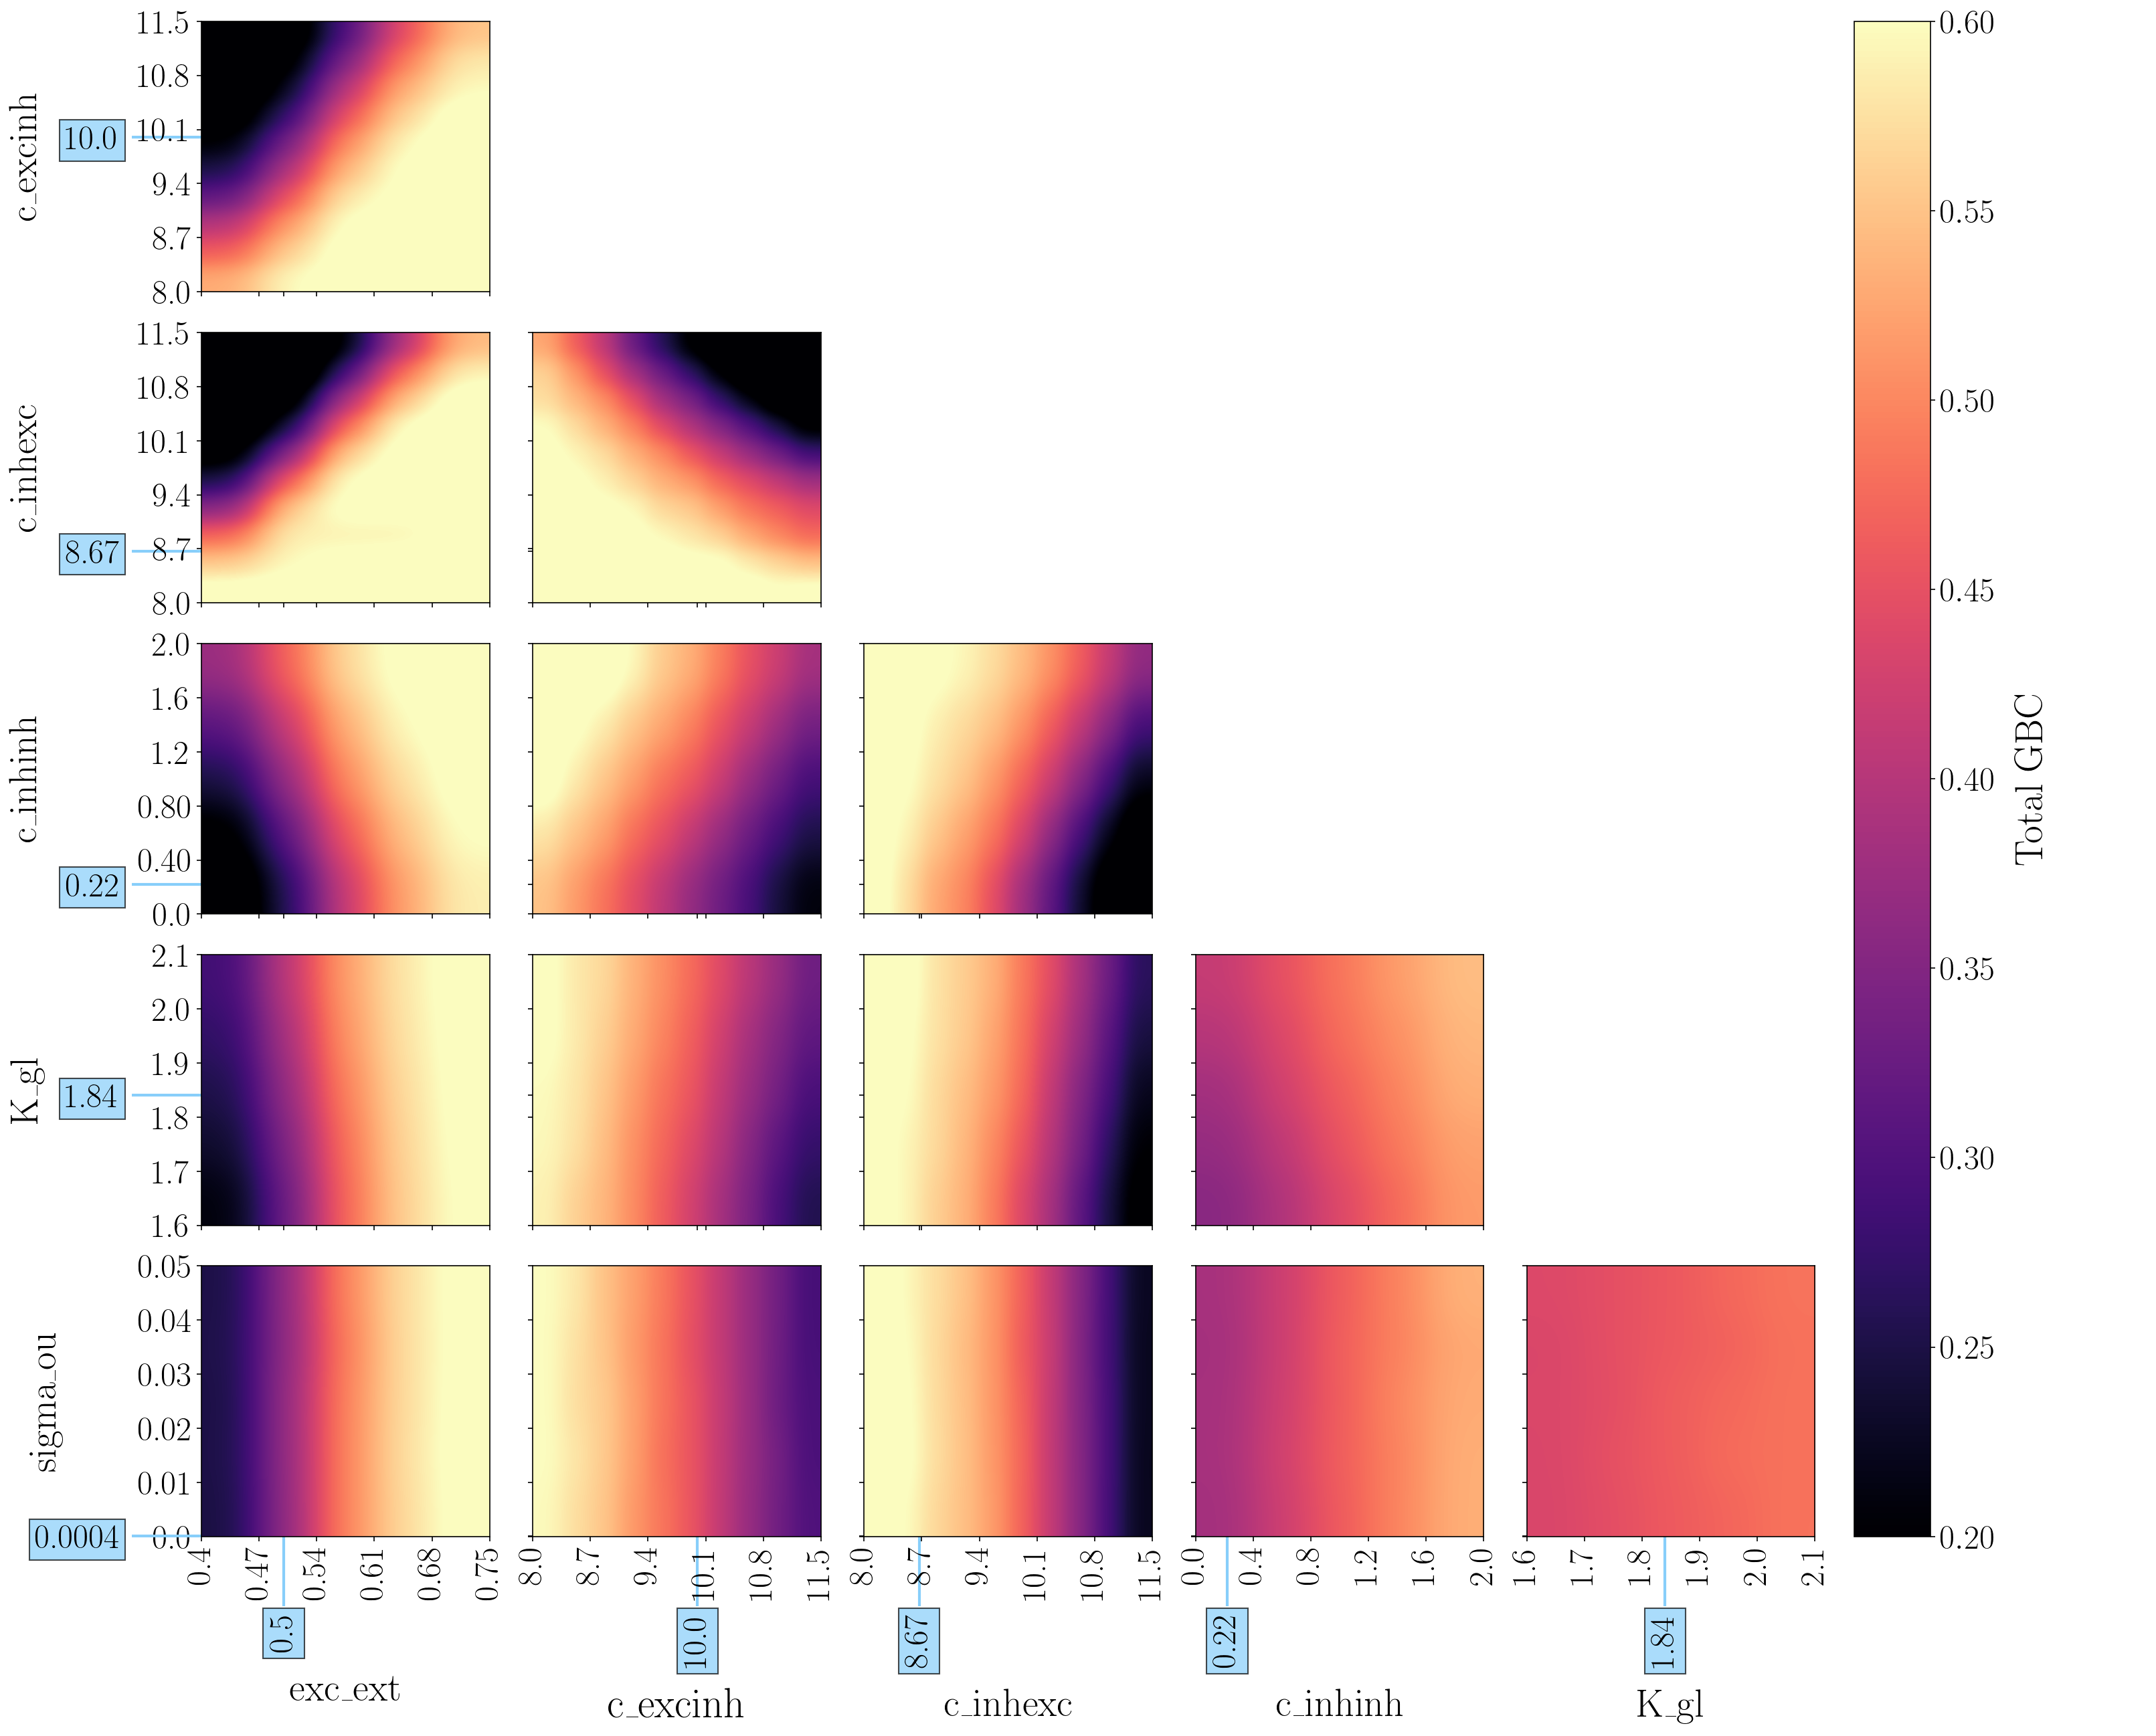

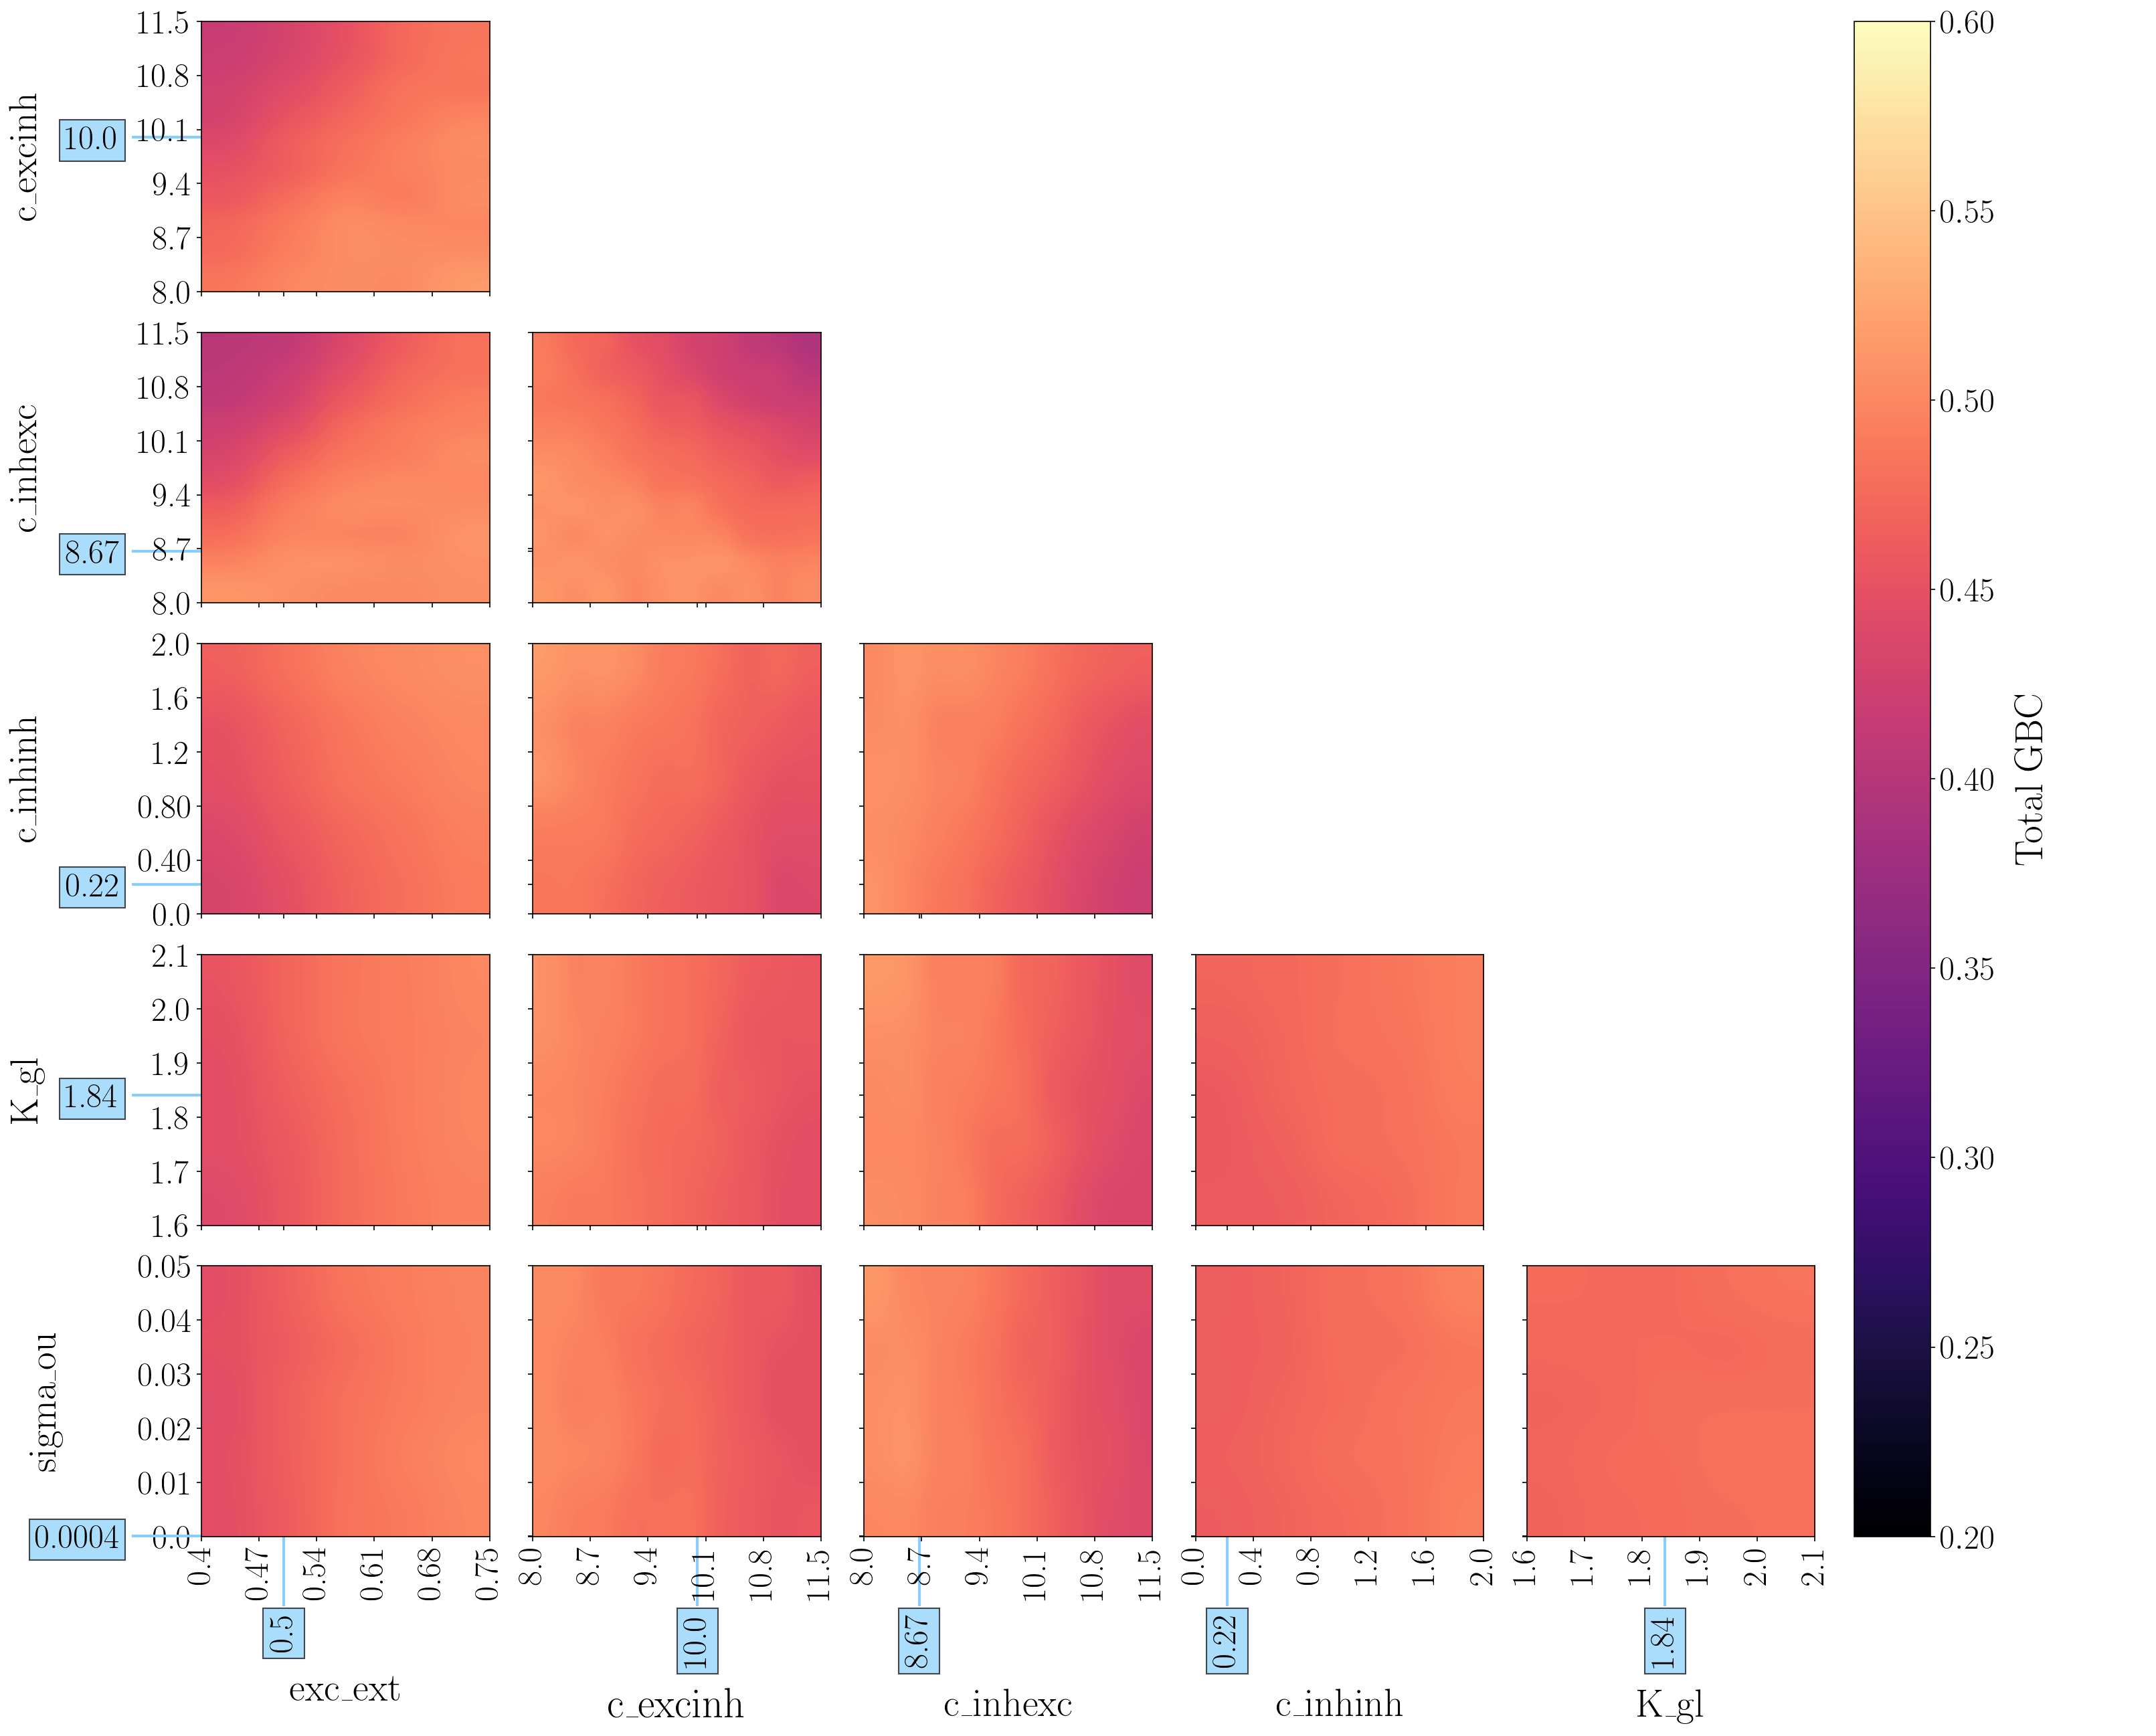

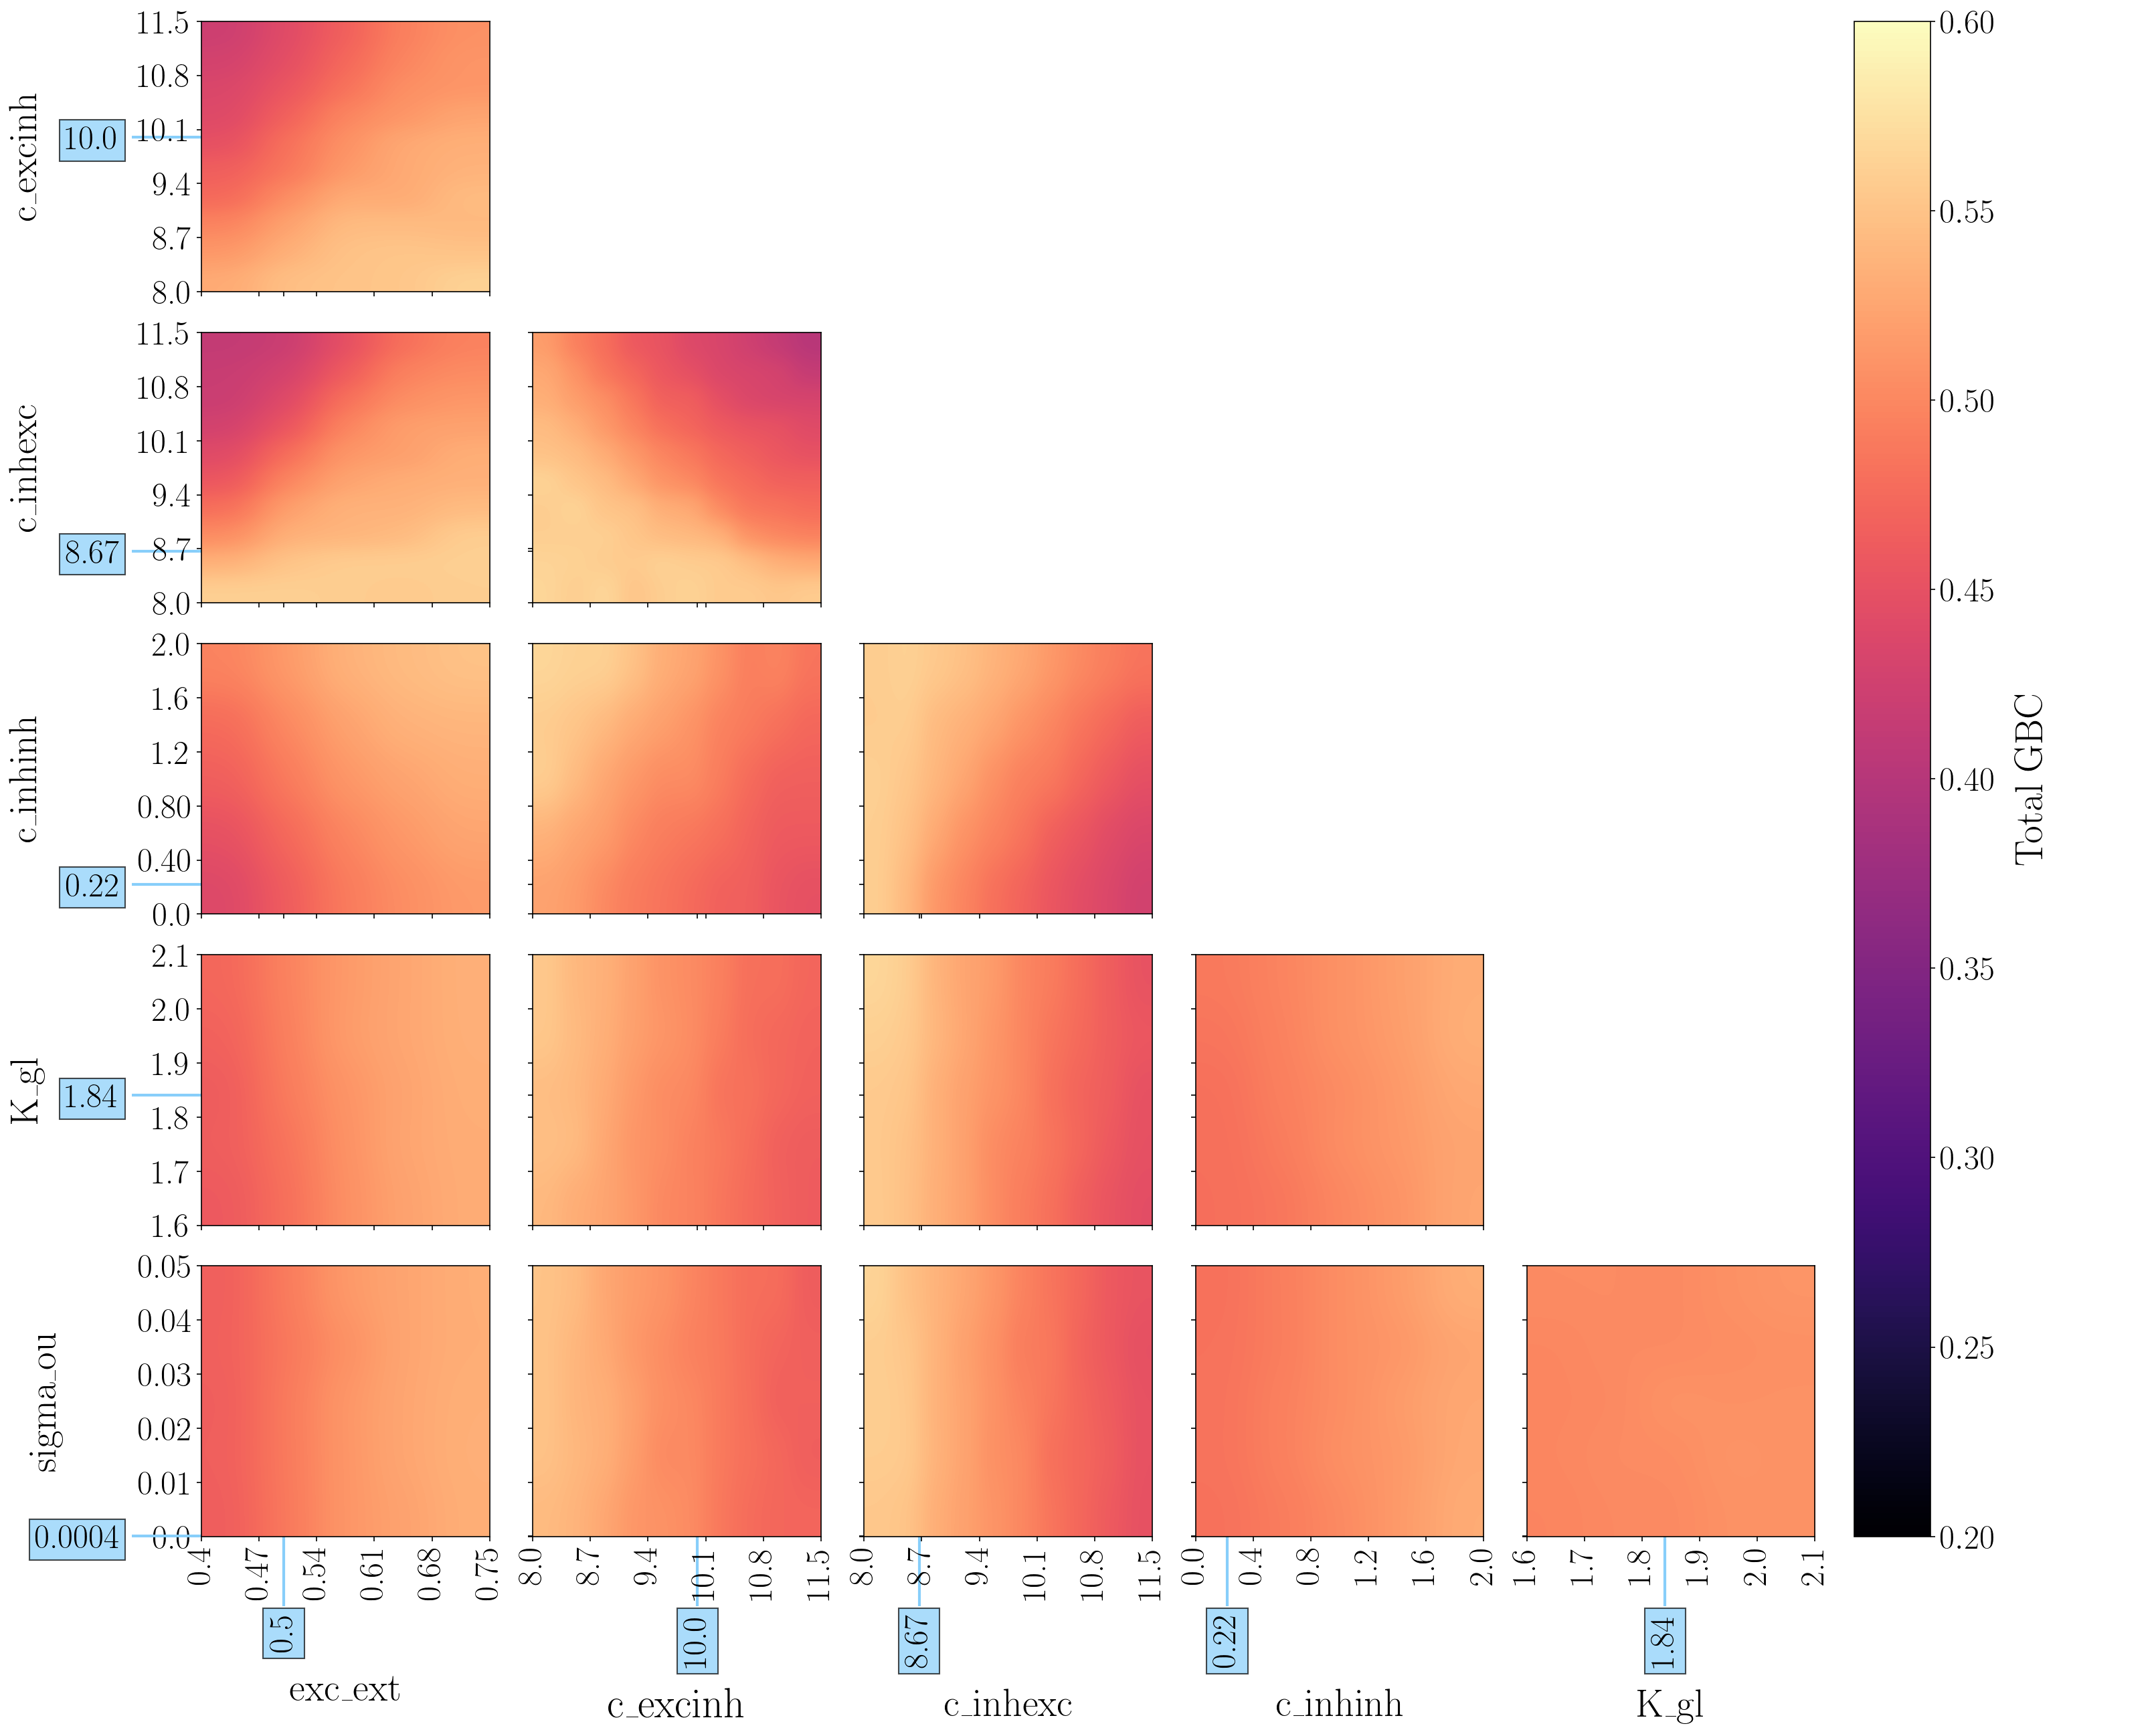

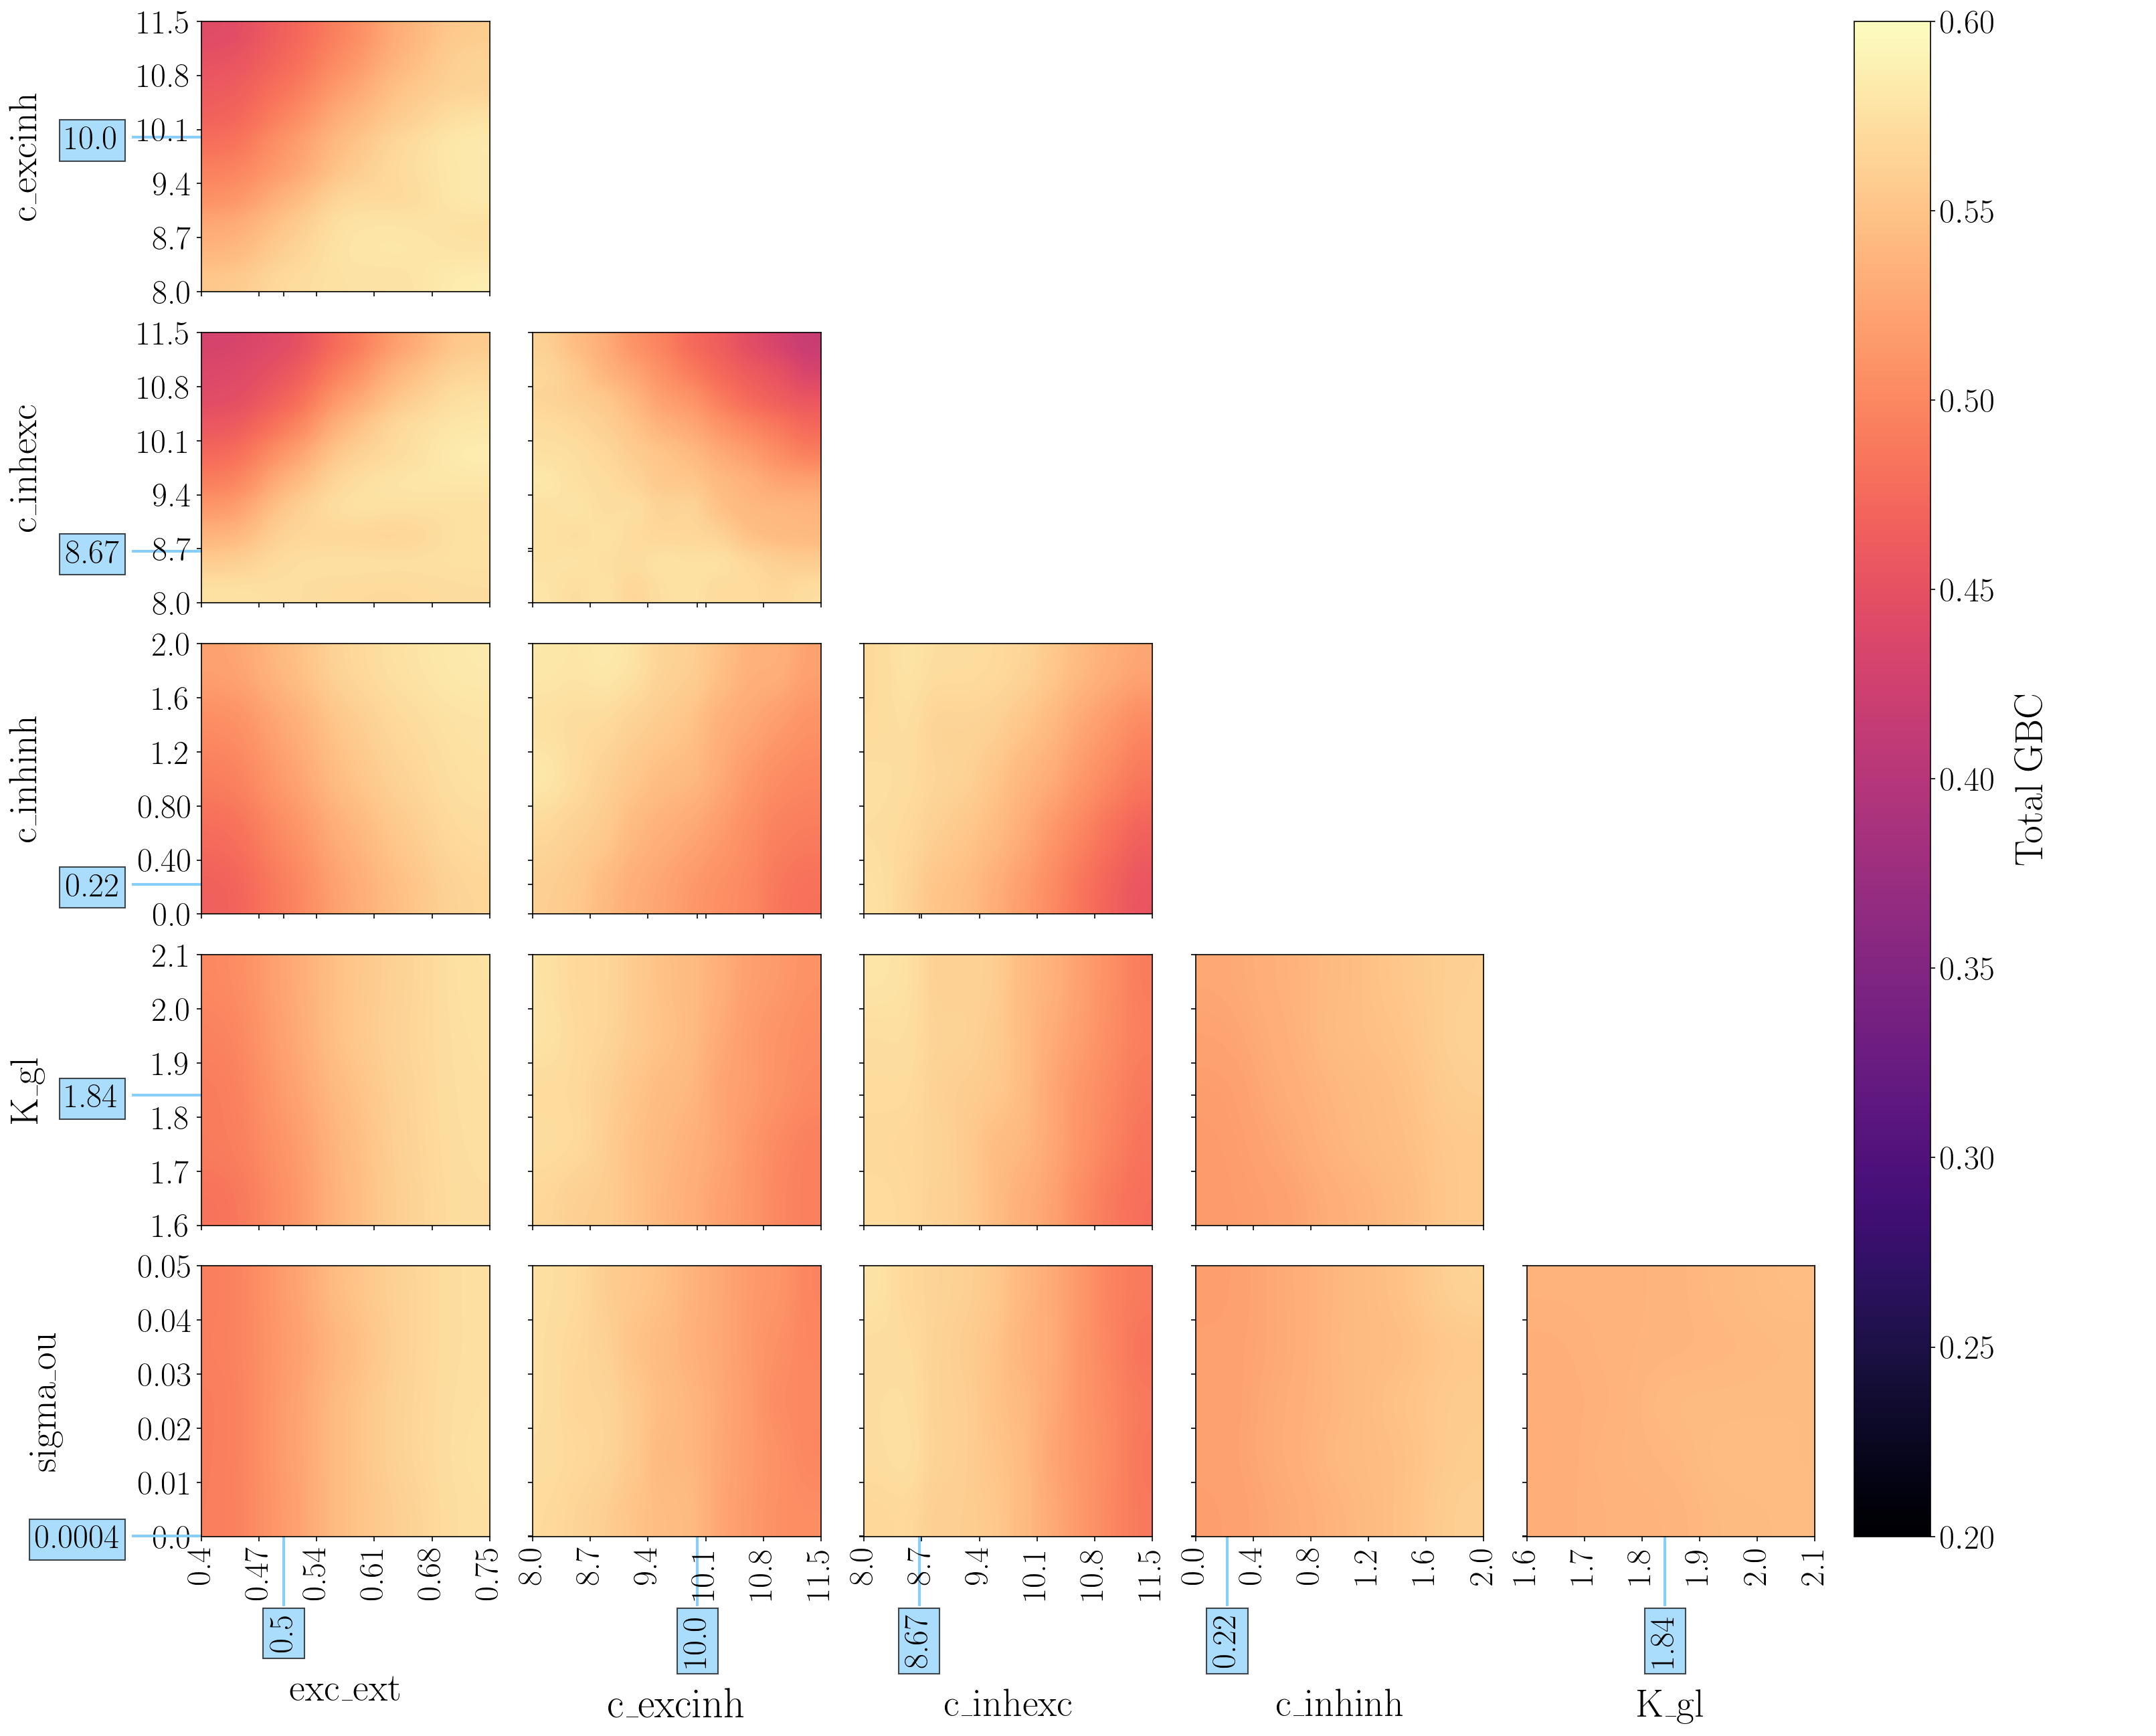

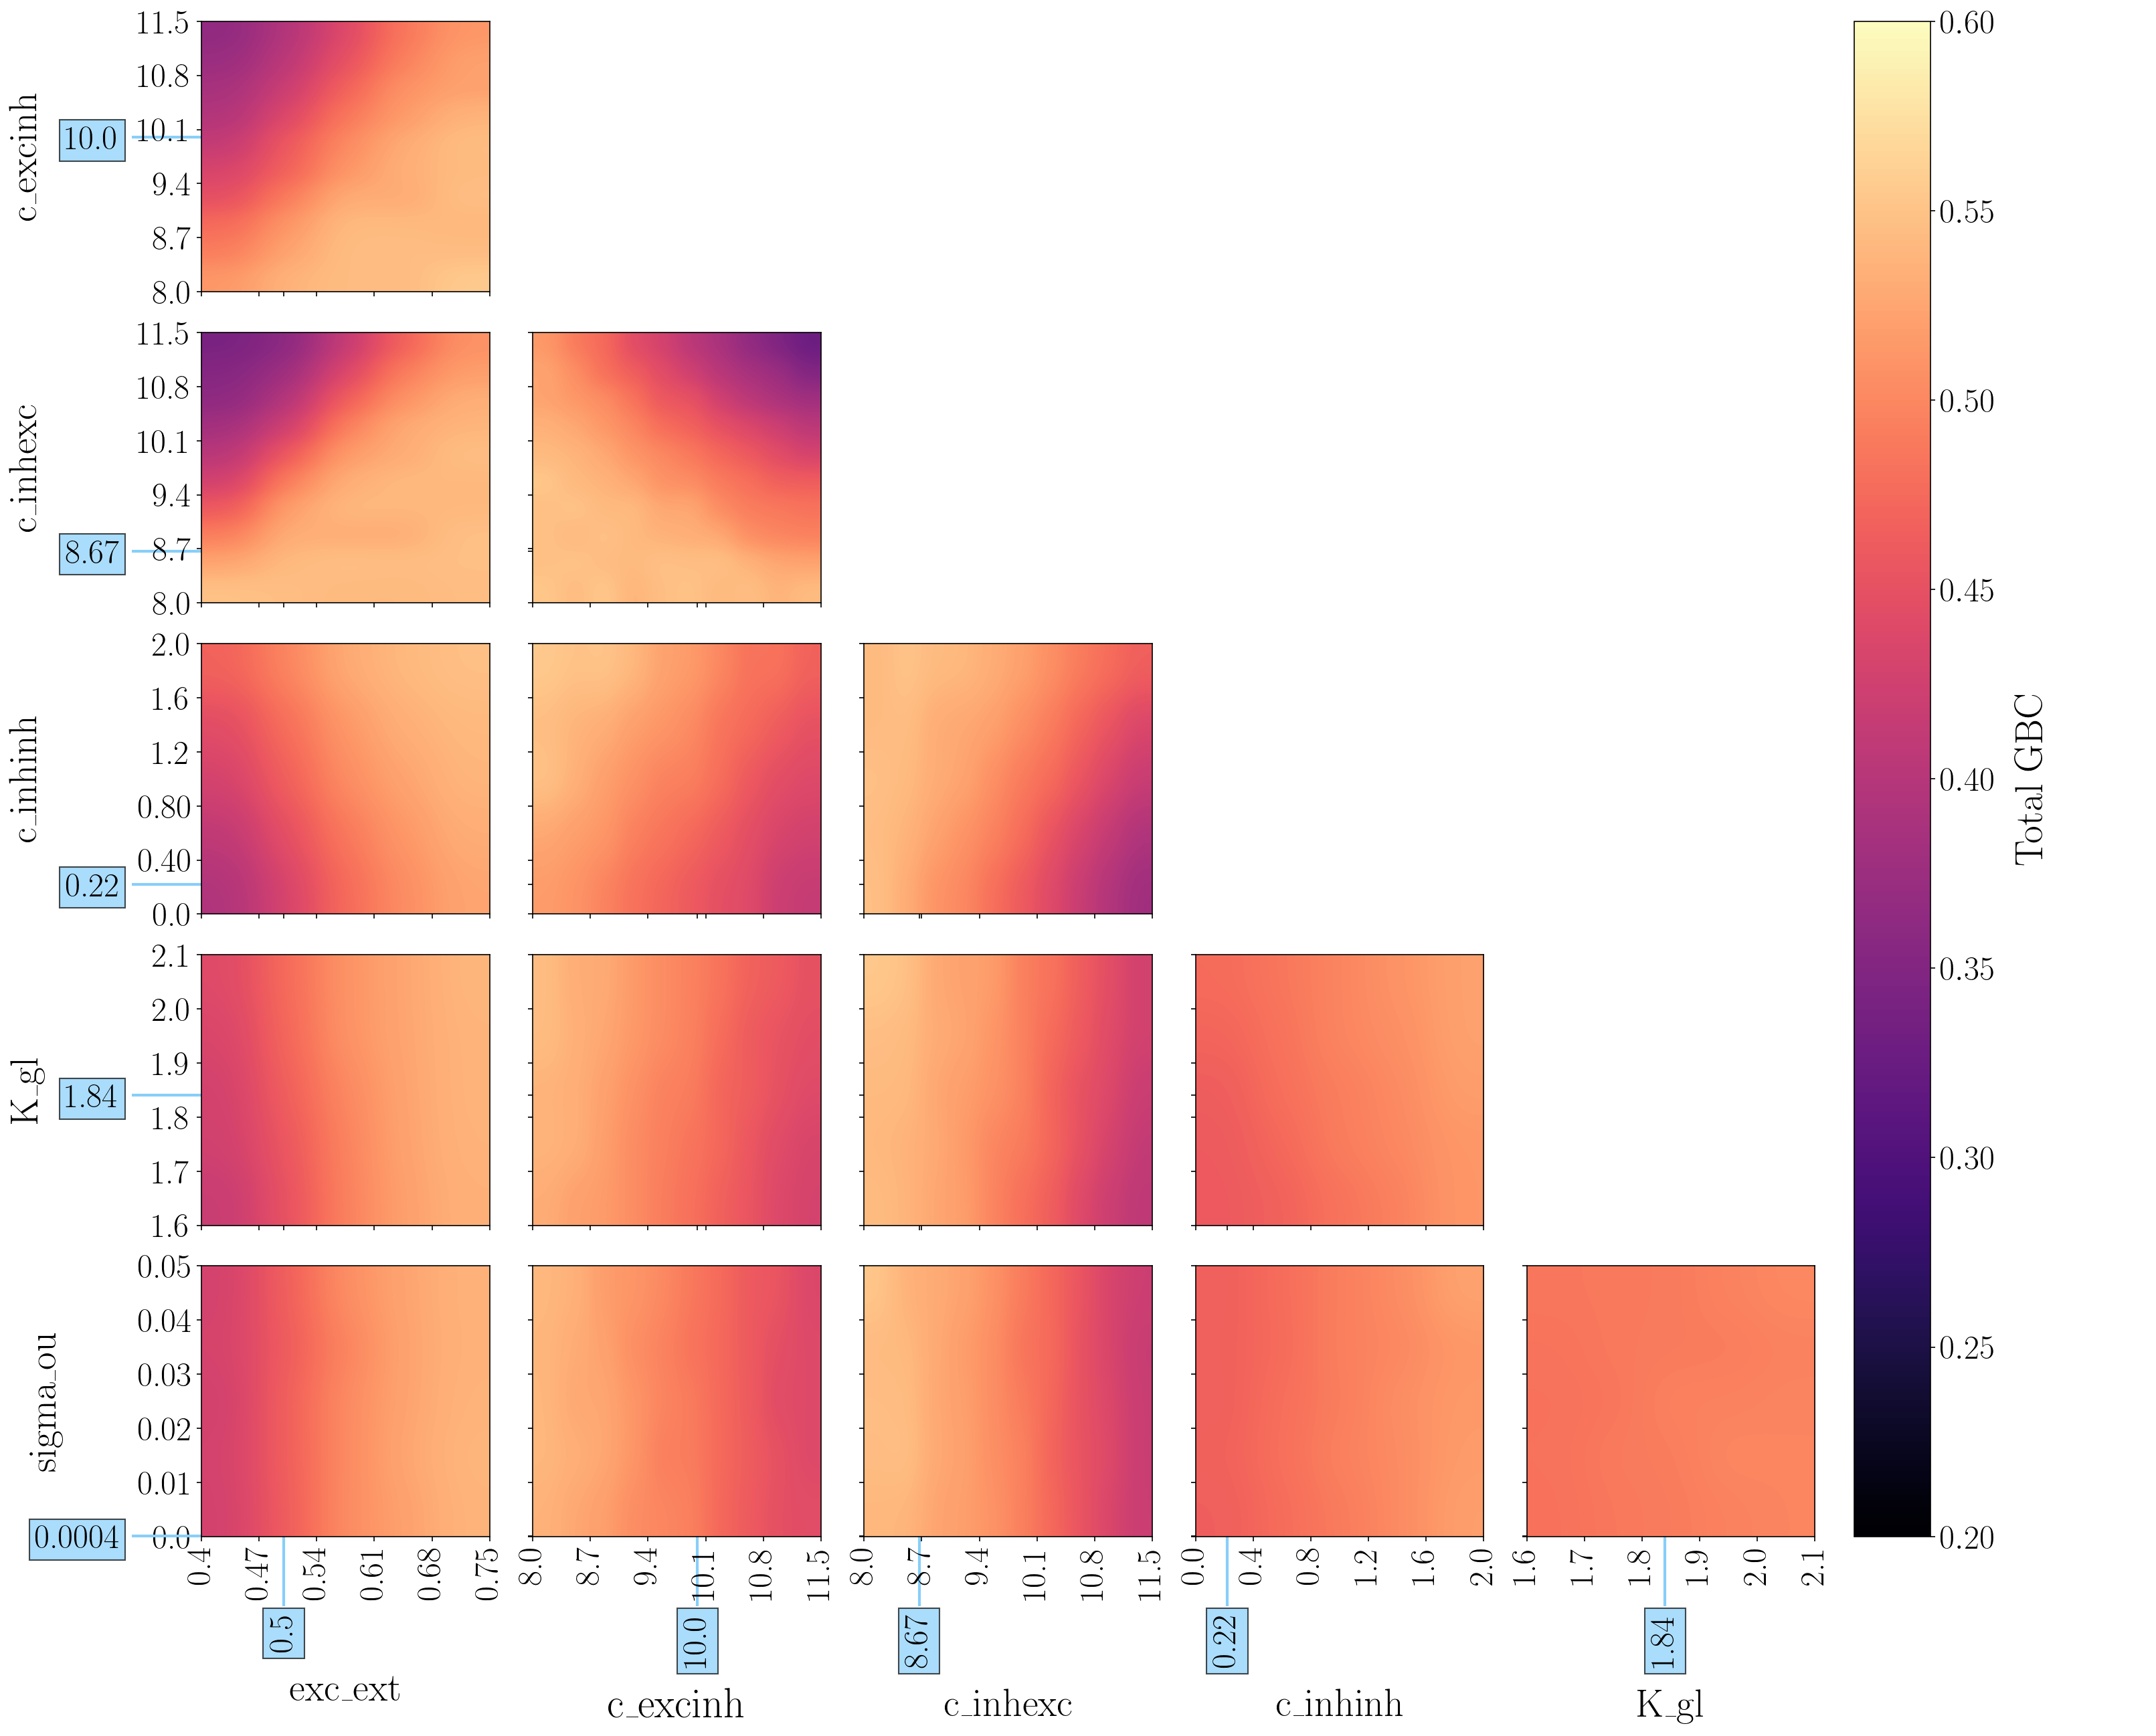

In [11]:
create_plot(gbc_parietal, 'parietal')

create_plot(gbc_frontal,'frontal')

create_plot(gbc_temporal,'temporal')

create_plot(gbc_occipital,'occipital')

create_plot(gbc_total,'total')